## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## EDA

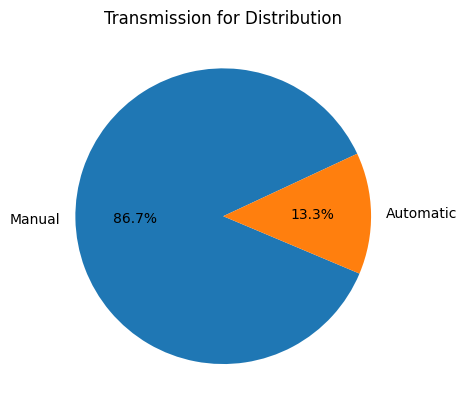

In [6]:
figsize=(5,5)
plt.pie(data['Transmission'].value_counts(),labels=['Manual','Automatic'],autopct='%1.1f%%',startangle=25)
plt.title('Transmission for Distribution')
plt.show()

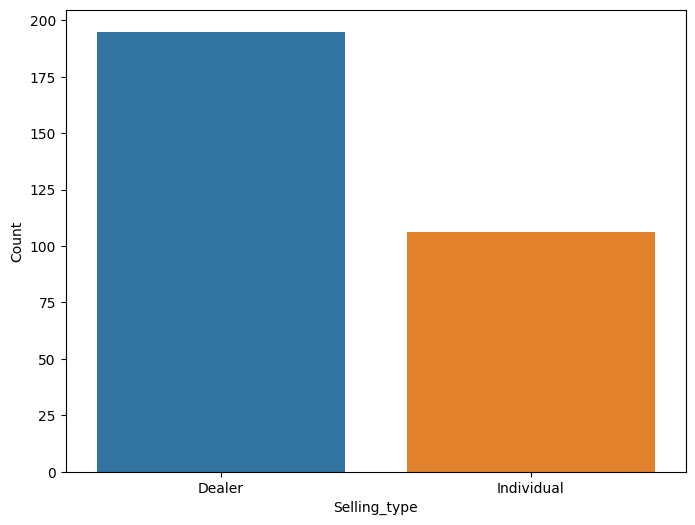

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Selling_type'])
plt.xlabel('Selling_type')
plt.ylabel('Count')
plt.show()

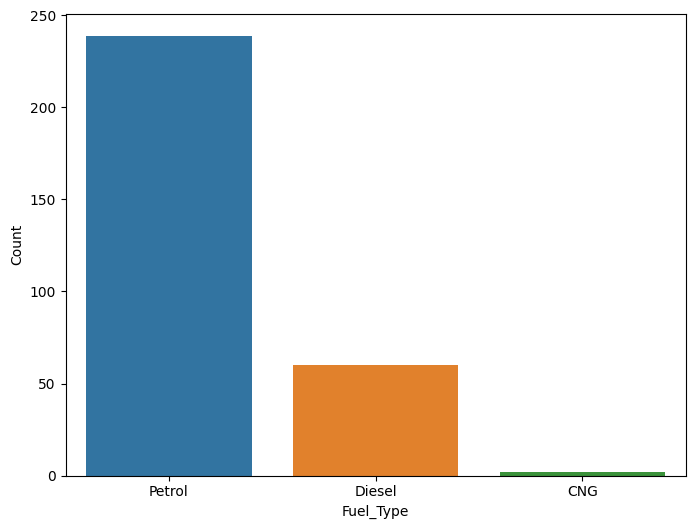

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Fuel_Type'])
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

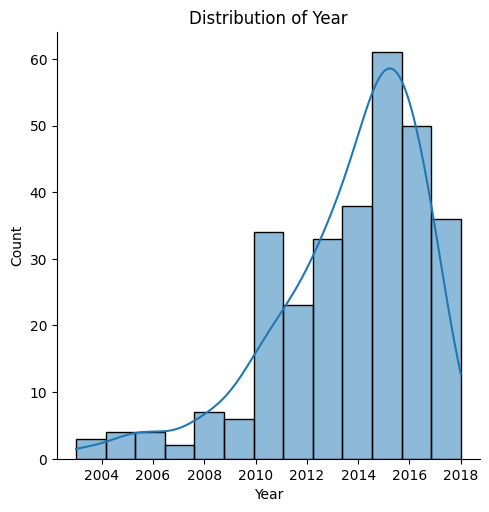

<Figure size 1000x600 with 0 Axes>

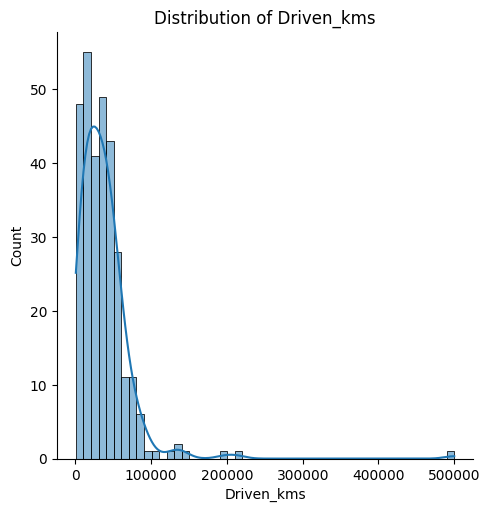

<Figure size 1000x600 with 0 Axes>

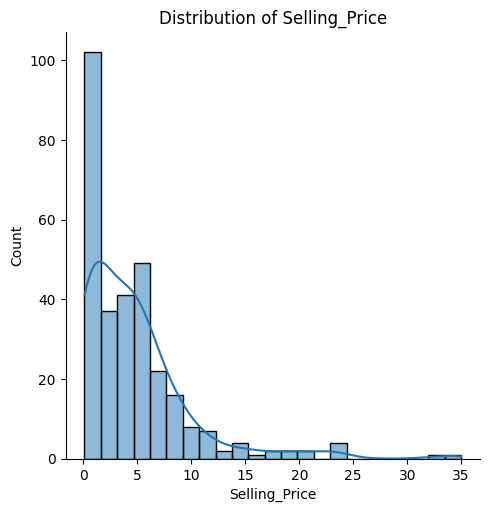

<Figure size 1000x600 with 0 Axes>

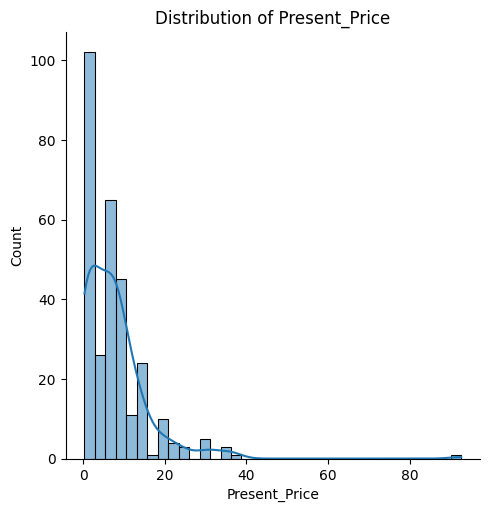

In [9]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

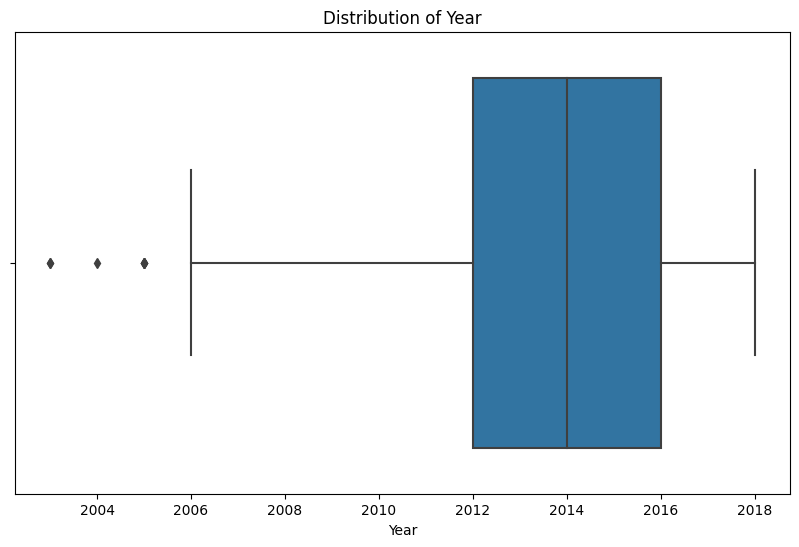

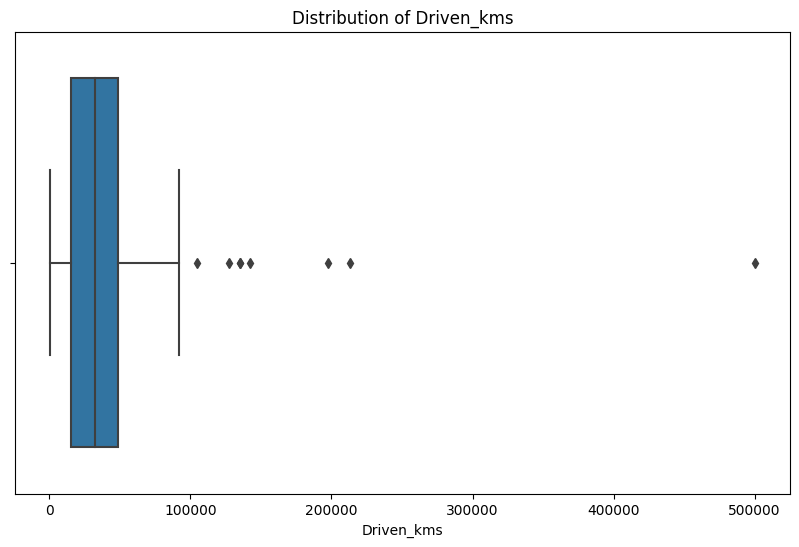

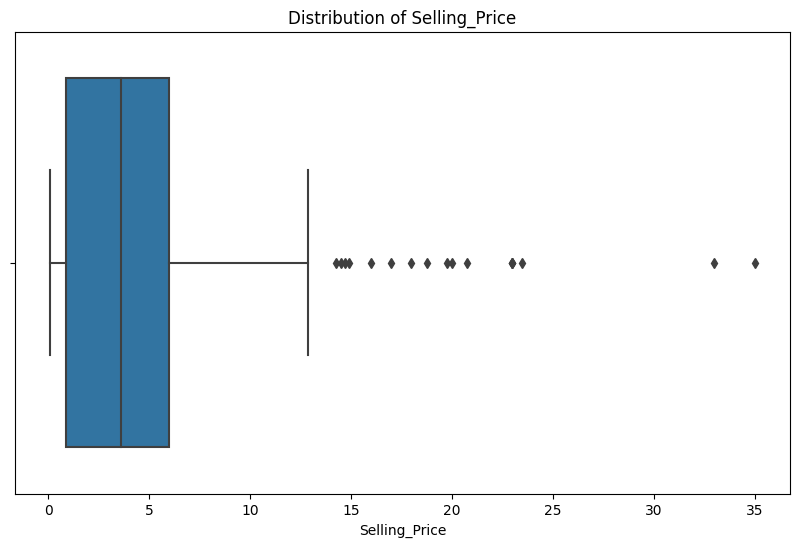

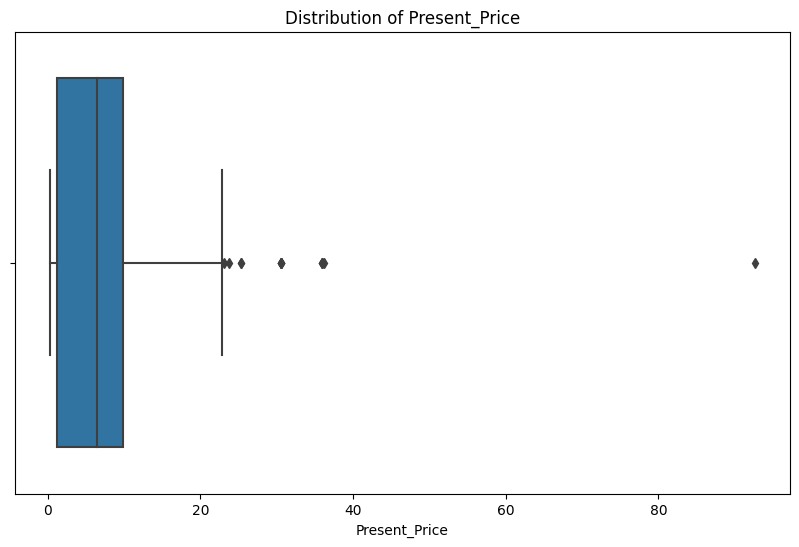

In [10]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

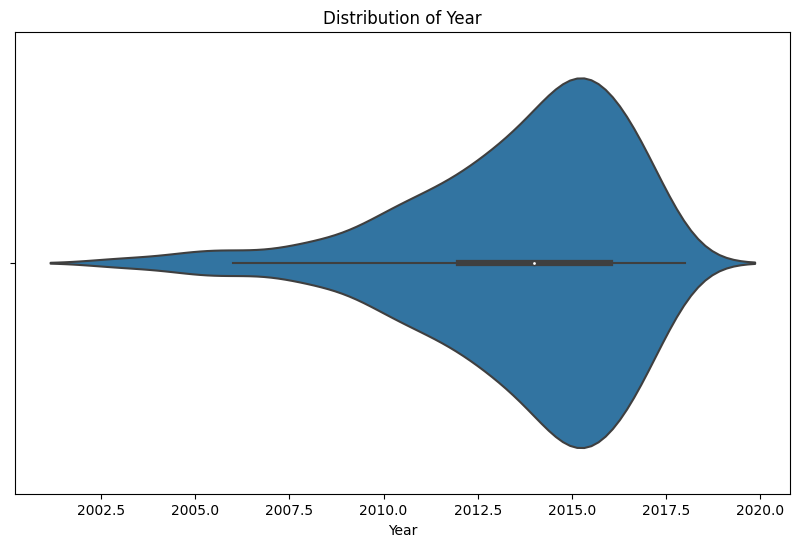

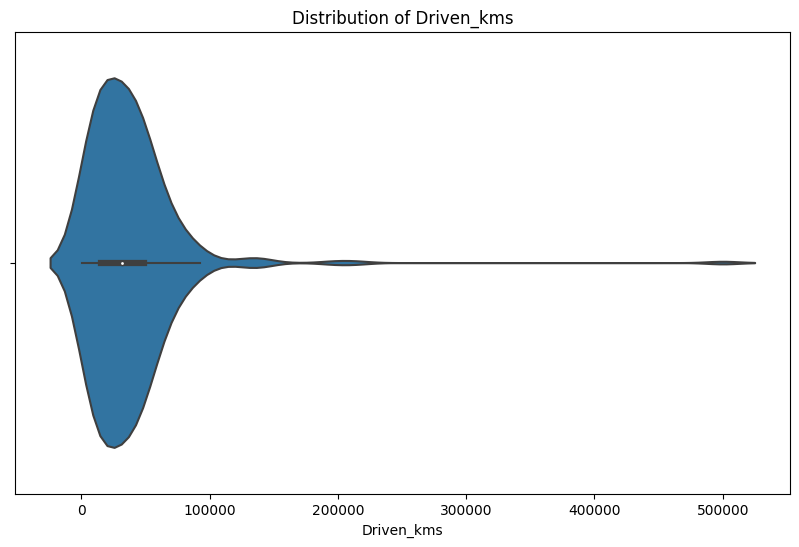

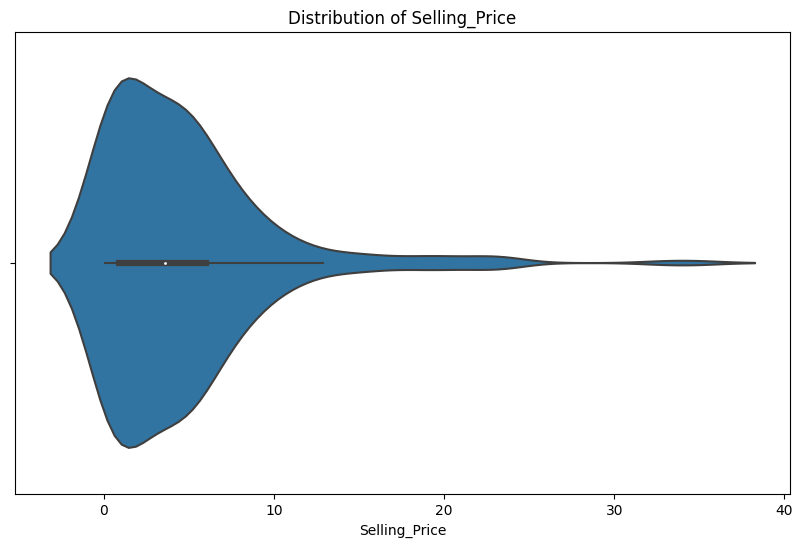

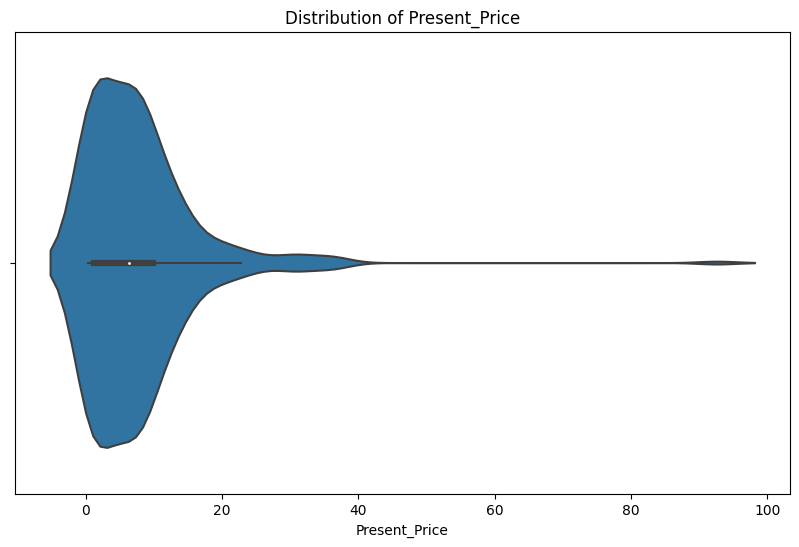

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Dropping Unnecessary Columns

In [12]:
data.drop(['Car_Name','Owner'],axis=1,inplace=True)

In [13]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission'],
      dtype='object')

In [14]:
X=data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']

## Converting Categorical Values

In [15]:
X['Fuel_Type'] = X['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2})
X['Selling_type'] = X['Selling_type'].replace({'Dealer':0,'Individual':1})
X['Transmission'] = X['Transmission'].replace({'Manual':0,'Automatic':1})

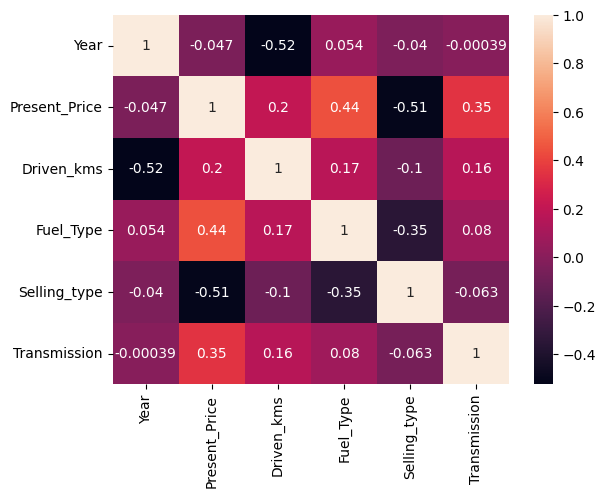

In [16]:
sns.heatmap(X.corr(),annot=True)
plt.show()

## Training The Model

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=45)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate The Model

In [19]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2.14896533831612
R-squared: 0.8989532977930752
